In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [2]:
df = pd.read_csv("cleaned_rainfall_data.csv", index_col="time")
df.head()

,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd
time,,,,,,,,,,,,,,,,
1948-01-01,0.043999,-0.005003,-0.050001,9.959991,22.25,42.50,47.500015,101910.0,281.41998,296.07000,16.120010,4.600006,-1.879990,-1.209992,-0.589996,-1.989990
1948-01-02,0.094997,0.104998,0.006998,9.519989,19.50,32.75,51.250015,102190.0,282.12000,295.99000,18.000015,3.570007,-3.589996,-5.759995,-4.379990,-4.009995
1948-01-03,0.038998,0.036999,0.013998,10.220001,25.50,25.50,52.750015,102222.0,282.25000,295.91998,13.820007,3.570007,-2.759994,-3.939987,-1.909988,-1.259994
1948-01-04,0.264997,0.215998,0.077997,9.470001,11.25,15.75,50.500015,102042.0,282.20000,295.87000,14.750015,5.000015,-1.089996,-16.789993,-7.789993,-5.259995
1948-01-05,0.100998,0.128998,0.016998,11.269989,39.75,33.25,47.000015,102215.0,282.34998,295.80000,27.470001,9.320007,-3.309998,-12.139984,-6.079987,-3.259994


## PRE-PROCESSING

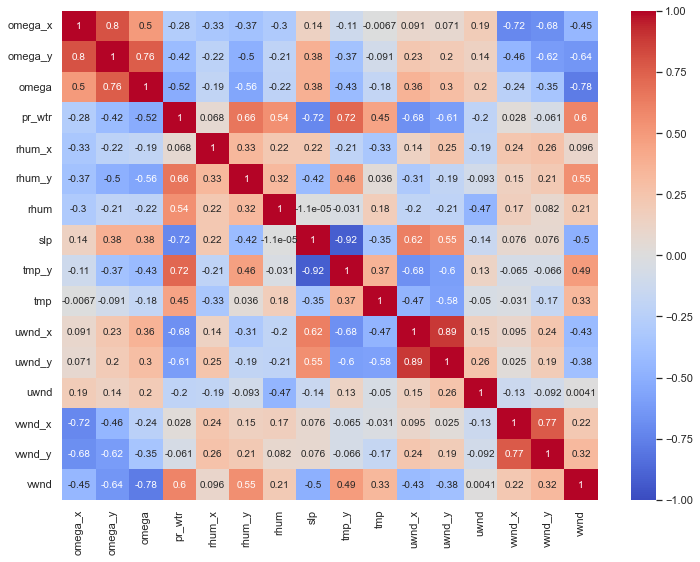

In [3]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

The heatmap shows there are corelations among the variable, hence there is need to de-correlate this variables.

In [15]:
X = df.drop("pr_wtr", axis=1)
y = df["pr_wtr"]

## SPLIT
We will be using a vertical split due to the time series nature of the dataset

In [16]:
cutoff = int(len(X) * 0.8)
X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled =pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled =pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

X_train_scaled.head()

,omega_x,omega_y,omega,rhum_x,rhum_y,rhum,slp,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd
time,,,,,,,,,,,,,,,
1948-01-01,0.105960,-0.137678,-0.175569,-0.151977,-0.157593,0.798035,1.451014,-1.674045,-0.445492,0.101682,-0.364950,-1.389581,0.088539,0.373344,-0.783700
1948-01-02,0.710388,1.100773,0.449798,-0.278951,-0.564149,1.045471,1.797852,-1.597685,-0.475232,0.264576,-0.543671,-2.134860,-0.592545,-0.528306,-1.416406
1948-01-03,0.046688,0.335202,0.526599,-0.001916,-0.866460,1.144445,1.837491,-1.583504,-0.501261,-0.097602,-0.543671,-1.773117,-0.320110,0.059314,-0.555051
1948-01-04,2.725201,2.350477,1.228766,-0.659875,-1.273017,0.995984,1.614524,-1.588958,-0.519841,-0.017021,-0.295543,-1.045276,-2.243610,-1.339555,-1.807931
1948-01-05,0.781505,1.370981,0.559516,0.656042,-0.543300,0.765044,1.828820,-1.572598,-0.545863,1.085104,0.454041,-2.012827,-1.547557,-0.932739,-1.181491


In [18]:
train_index = X_train_scaled.index
test_index = X_test_scaled.index

In [19]:
pca = PCA()
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)

In [22]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= df.drop("pr_wtr", axis=1).columns, index=train_index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= df.drop("pr_wtr", axis=1).columns, index=test_index)

X_train_scaled.head()

,omega_x,omega_y,omega,rhum_x,rhum_y,rhum,slp,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd
time,,,,,,,,,,,,,,,
1948-01-01,0.869337,1.178100,-2.063933,0.452422,-0.120891,-0.873288,-0.240058,-0.150608,-0.698002,0.502925,-0.276958,-0.464591,0.352886,0.146279,0.208958
1948-01-02,2.302237,0.111197,-3.123986,0.232920,0.155832,-0.952262,-0.445396,-0.354585,-0.529154,0.283570,-0.111068,-0.236083,0.168869,-0.332529,0.170675
1948-01-03,1.413487,0.794499,-2.774208,0.579519,0.048897,-0.833669,-0.009360,0.256374,-0.789795,0.110187,-0.587364,0.010362,-0.039545,-0.163152,-0.130155
1948-01-04,4.422140,-2.111425,-2.700542,-0.515704,-0.307757,-0.641633,-0.404552,-0.142782,-0.874598,-0.452507,-0.602326,-0.708182,0.022131,-0.042135,0.298377
1948-01-05,3.107049,0.378475,-2.798989,-1.014702,-0.364516,-0.955246,-0.248957,-0.110318,0.336520,0.053292,-0.224341,0.198068,-0.069593,-0.561514,0.139792


In [23]:
X_test_scaled.head()

,omega_x,omega_y,omega,rhum_x,rhum_y,rhum,slp,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd
time,,,,,,,,,,,,,,,
2004-10-19,0.117638,0.054088,-0.256920,1.968785,-0.135632,-0.048012,0.390058,0.038348,0.178413,0.566881,-0.194167,-0.480964,-0.031200,-0.102341,-0.125682
2004-10-20,0.263728,0.005330,0.228671,1.258024,-1.031818,0.199715,0.014893,-0.238336,-0.057646,0.552375,-0.019631,-0.535293,-0.238103,-0.067001,0.020110
2004-10-21,1.261933,-0.651000,-0.857412,1.611865,-0.621089,-0.118405,0.022556,-0.274987,-0.057726,0.095318,-0.221364,-0.451104,-0.440682,-0.008744,-0.270635
2004-10-22,1.368520,-1.008587,-0.178733,1.786448,-0.678306,-0.045901,0.946825,0.335814,-0.384398,0.361890,0.088788,-0.587792,-0.051232,-0.428944,-0.197384
2004-10-23,0.676740,-0.527787,-0.242524,1.030560,-0.350657,0.339848,0.869425,-0.340040,-0.158793,0.729422,-0.564205,-0.388006,0.266618,-0.313730,-0.204486


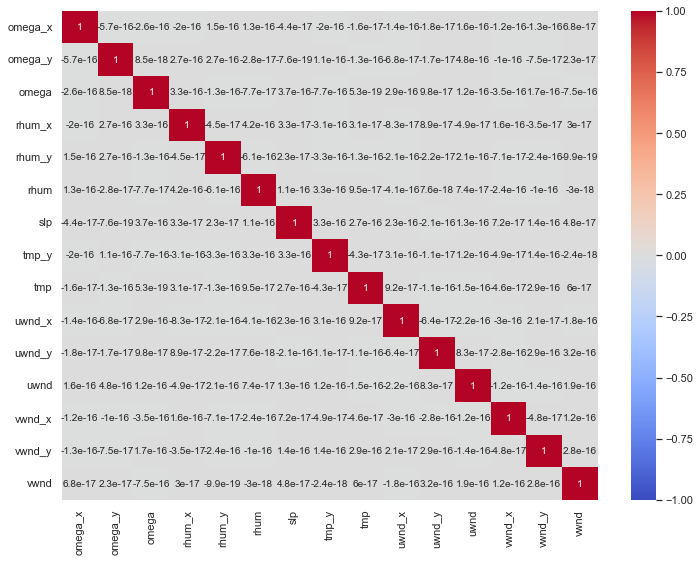

In [21]:
plt.figure(figsize=(12,9))
sns.heatmap(X_train_scaled.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

## MODEL

In [24]:
models = [
    ["linear regression", LinearRegression()],
    ["lasso", Lasso()],
    ["ridge", Ridge()]
]
results = []
names = []

for name, model in models:
    cv_result = cross_val_score(estimator=model, X=X_train_scaled, y=y_train, cv=5, scoring="neg_mean_absolute_error")
    cv_result = -1 * cv_result.mean()
    results.append(cv_result)
    names.append(name)
    
    print("{}: {}".format(name, cv_result))

linear regression: 2.5634102641031427
lasso: 3.332180142004591
ridge: 2.563393167841492


Among the models tested, ridge has the lowest cross validation score.

In [25]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

In [27]:
print(f"mean absolute error: {mean_absolute_error(y_train, ridge.predict(X_train_scaled))}")
print(f"mean squared error: {mean_squared_error(y_train, ridge.predict(X_train_scaled))}")
print(f"root mean squared error: {np.sqrt(mean_squared_error(y_train, ridge.predict(X_train_scaled)))}")

mean absolute error: 2.5073410758386725
mean squared error: 10.567060718517247
root mean squared error: 3.250701573278797


In [26]:
print(f"mean absolute error: {mean_absolute_error(y_test, y_pred)}")
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

mean absolute error: 2.4992996388036555
mean squared error: 10.426404654630025
root mean squared error: 3.22899437203443
